In [83]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [84]:
# Reading the files
df = pd.read_csv("../project_data_pipeline/data_set/data_set_clean", encoding='utf-8', sep=',')
combined = pd.read_csv("../project_data_pipeline/data_set/combined_data_set")

In [85]:
'''  Hypothesis
    - We are fasters now a days?
    - The place where happen the marathon impact in the result?
    - How develpment the country that the winners were born have impact?
'''

'  Hypothesis\n    - We are fasters now a days?\n    - The place where happen the marathon impact in the result?\n    - How develpment the country that the winners were born have impact?\n'

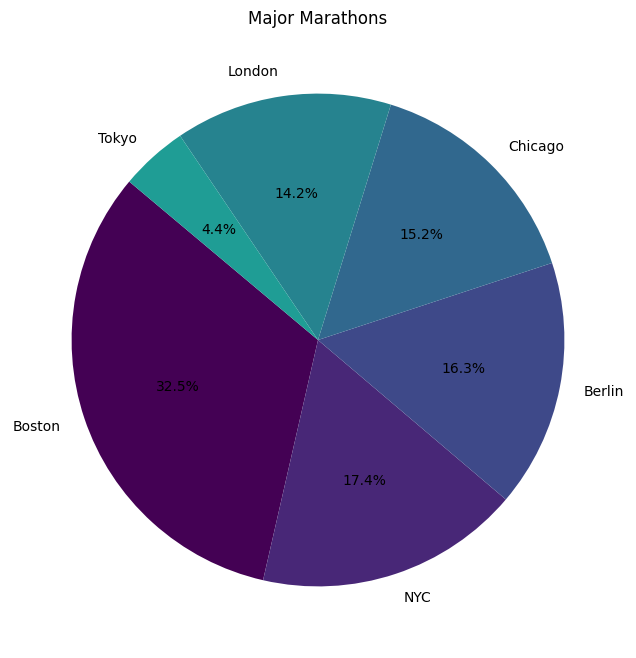

In [96]:
# Exploring data set
# Where happen the marathons in our dataset?
def country_marathon(data_frame):
        colors = ["#440154", "#482777", "#3E4989", "#31688E", "#26838F", "#1F9D95", "#22B16C", "#43C555", "#7AD151", "#AAD946", "#D4EE00"]
        plt.figure(figsize=(14, 8))
        plt.pie((data_frame["marathon"].value_counts()).values, 
        labels = (data_frame["marathon"].value_counts()).index,
        autopct='%1.1f%%', startangle=140,colors=colors)
        plt.title('Major Marathons')
        plt.savefig(f'../project_data_pipeline/images/country_marathon.png')
        os.system(f"open images/country_marathon.png")

country_marathon(df)

In [87]:
# The arrange of year?
print(f'Our data set goes {df["year"].min()} to {df["year"].max()}')

print(f'Our data set goes {df["year"].min() } to {df["year"].max()}')

Our data set goes 1897 to 2018
Our data set goes 1897 to 2018


In [88]:
# The winners? 
# Creating a function to do tha analysis of the winners, total participants, and per gender
def gender(data_frame):
    # Calculate the number of male and female winners
    male = (data_frame['gender'] == 'Male').sum()
    female = (data_frame['gender'] == 'Female').sum()
    # Create a DataFrame to display the results
    per_group = pd.DataFrame({'Gender': ['Male', 'Female','All'], 'Total': [male, female ,male + female]})
    return per_group

per_group = gender(df)
per_group

,Gender,Total
0,Male,303
1,Female,233
2,All,536


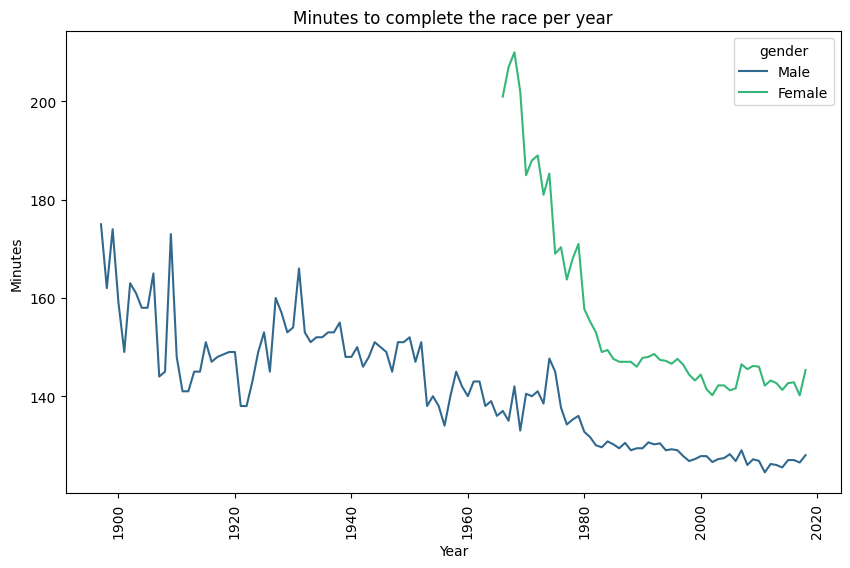

In [97]:
# Hip 1 - We are fasters now a days?

def faster(data_frame):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='year', y='minutes', hue='gender', 
    data=data_frame, palette='viridis', errorbar=None)
    plt.xticks(rotation=90)
    plt.xlabel('Year')
    plt.ylabel('Minutes')
    plt.title('Minutes to complete the race per year')
    # Saving the plot as a image
    plt.savefig(f'../project_data_pipeline/images/faster.png')
    os.system(f"open images/faster.png")

faster(df)

In [90]:
female_df = df[df["gender"] == "Female"]
min_year_female = female_df["year"].min()
max_year_female = female_df["year"].max()

print(f'Our data set for females goes from {min_year_female} to {max_year_female}')


Our data set for females goes from 1966 to 2018


C:\Users\anafl\AppData\Local\Temp\ipykernel_33148\2879124965.py:5: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  fast = data_frame.groupby(["marathon", "gender"]).agg({"minutes":min}).reset_index()


,marathon,gender,minutes
0,Berlin,Female,139
1,Berlin,Male,122
2,Boston,Female,138
3,Boston,Male,123
4,Chicago,Female,137
5,Chicago,Male,123
6,London,Female,135
7,London,Male,123
8,NYC,Female,142
9,NYC,Male,125


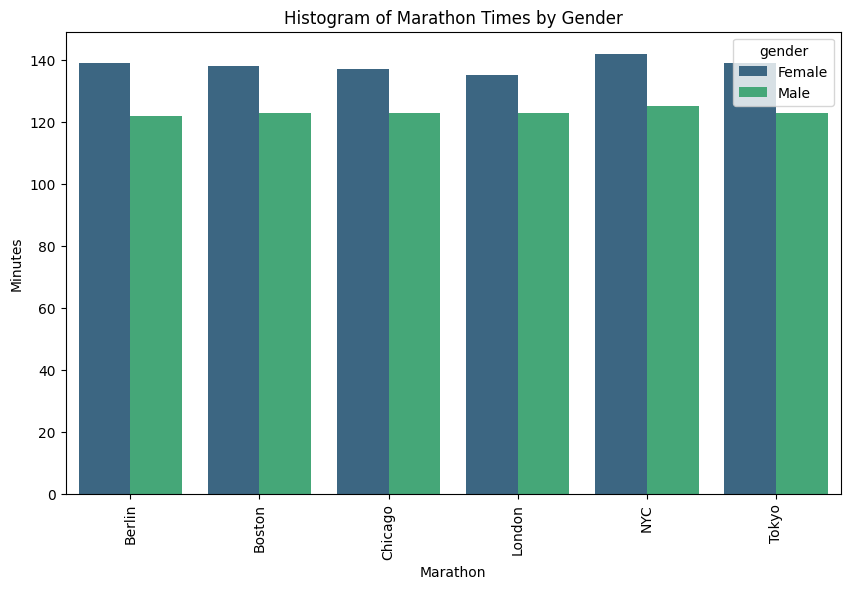

In [98]:
#The place where happen the marathon impact in the result?

def impact_marathon(data_frame):
    #Grouping so i get just the fasters of each marathon
    fast = data_frame.groupby(["marathon", "gender"]).agg({"minutes":min}).reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=fast, x='marathon', y='minutes', hue='gender', palette='viridis')
    plt.xlabel('Marathon')
    plt.ylabel('Minutes')
    plt.title('Histogram of Marathon Times by Gender')
    plt.xticks(rotation=90)
    # Saving the plot as a image
    plt.savefig(f'../project_data_pipeline/images/impact_marathon.png')
    os.system(f"open images/impact_marathon.png")
    return fast

impact_marathon(df)

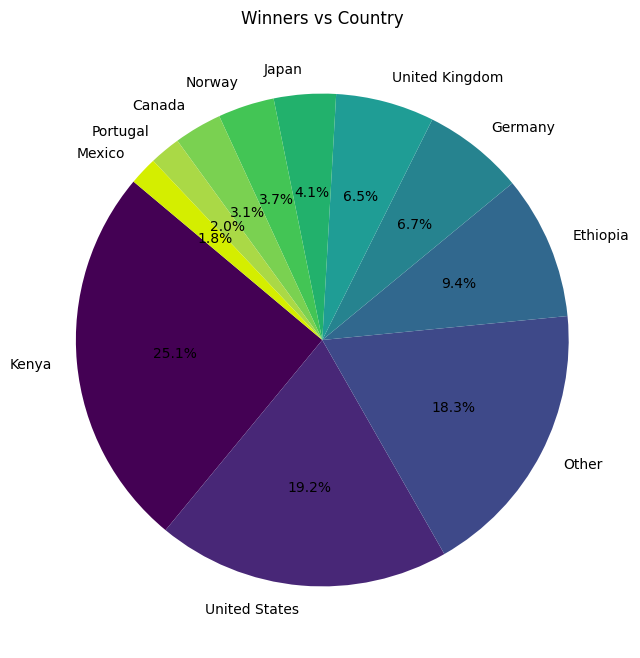

In [100]:
# Exploring data set
# Where are the winners from?
def winners_per_country(data_frame):
    # Creating a subset with just the top 10 country with more winners
    country = data_frame["country"].value_counts(dropna=False) 
    country_10 = country.index[:10].values
    # Creating another column on the original data set just describing the top 10 country and grouping the rest as 'Other'
    data_frame["country_10"] = data_frame["country"].where(data_frame["country"].isin(country_10), 
                        "Other") 

    # Creating a pie chart
    colors = ["#440154", "#482777", "#3E4989", "#31688E", "#26838F", "#1F9D95", "#22B16C", "#43C555", "#7AD151", "#AAD946", "#D4EE00", "#FFFF7E"]
    plt.figure(figsize=(14, 8))
    plt.pie((data_frame["country_10"].value_counts()).values, 
            labels = (data_frame["country_10"].value_counts()).index,
            autopct='%1.1f%%', startangle=140,
            colors=colors)
    plt.title('Winners vs Country')
    plt.savefig(f'../project_data_pipeline/images/winners_per_country.png')
    os.system(f"open images/winners_per_country.png")

winners_per_country(df)

In [93]:
combined.columns

Index(['Unnamed: 0', 'Country', 'Total Winners', 'Percentage', 'HDI'], dtype='object')

The correlation between Total Winners and HDI is: -0.19939


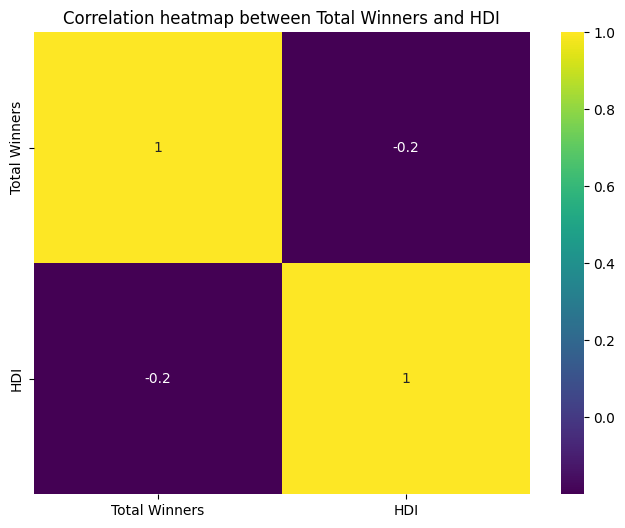

In [94]:
#How develpment the country that the winners were born have impact?

def correlation(data_frame, column1, column2):
    # Calculating the correlation between column1 and column2
    corr = round( (data_frame[column1].corr(data_frame[column2])), 5)
    print(f'The correlation between {column1} and {column2} is: {corr}')
    # Calculate the correlation matrix
    correlation_matrix = data_frame[[column1, column2]].corr()
    # Create a heatmap to visualize the correlation
    plt.figure(figsize=(8, 6))
    sns.heatmap(data=correlation_matrix, annot=True, cmap="viridis")
    plt.title(f'Correlation heatmap between {column1} and {column2}')
    plt.savefig(f'../project_data_pipeline/images/correlation_winners_HDI.png')
    os.system(f"open images/correlation_winners_HDI.png")

correlation(combined, 'Total Winners', 'HDI', 'correlation_winners_HDI')


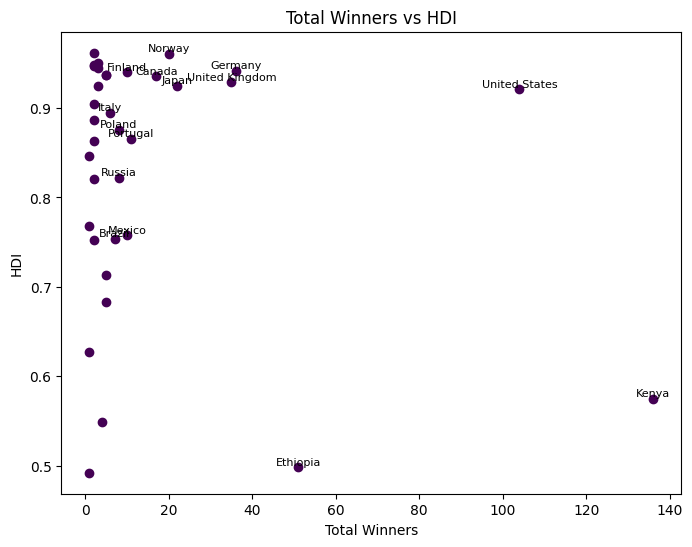

In [101]:
# Contuning with the HDI analysis 

def winners_hdi(data_frame, column1, column2):
    plt.figure(figsize=(8, 6))
    # Create a scatter plot for column1 vs. column2 for the first 15 elements
    plt.scatter(data_frame[column1][:15], data_frame[column2][:15], marker='o', color="#440154")
    # Add labels only for the first 15 countries 
    for i, row in data_frame[:15].iterrows():
        plt.text(row[column1], row[column2], row['Country'], fontsize=8, ha='center', va='bottom')

    # Create plot for excluding the first 15 elements and without label
    plt.scatter(data_frame[column1][15:], data_frame[column2][15:], marker='o', color="#440154")
    plt.xlabel('Total Winners')
    plt.ylabel('HDI')
    plt.title('Total Winners vs HDI')
    plt.savefig(f'../project_data_pipeline/images/scatter_winners_HDI.png')
    os.system(f"open images/scatter_winners_HDI.png")

winners_hdi(combined, 'Total Winners', 'HDI')
    